In [ ]:
# This is a single label, multiclass problem. The problem is to classify newswires into 
# 46 mutually exclusive topics. Each newswire can only be put into one topic. We use the
# Reuters dataset for this problem.

from keras.datasets import reuters
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

# This function makes the sequences into a format that can be read. 
def vectorize_sequences(sequence, dimension=10000):

  results = np.zeros((len(sequence), dimension))
  for i, seq in enumerate(sequence):
    results[i, seq] = 1
   
  return results

# This used to vectorize the labels. For categorical encoding we use one hot.
# It turns each label into an all-zero vector with a 1 in place of label index.
def to_one_hot(labels, dimension=46):

  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  
  return results
  


# num_words limits to top 10000 frequent words. labels show which category data point belongs to.
# There are 0-45 (inclusive) values.  
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Vectorize the input data into a format that can be read. Consists of turning each 
# data point into a vector filled with 1's and 0's.
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# There is inbuilt way of doing categorical encoding. Use 
# from keras.util.np_utils import to_categorical
# 
# one_hot_train_labels = to_categorical(train_labels)
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# We use sequential architecture with dense layers. We use a lot of hidden layers since
# there are 46 categories and having too few e.g. 16 layers may lead to information being 
# lost inbetween layers so we use 64. We use softmax so that it outputs a 46 dimensional vector
# where the i th entry corresponds to a probability that the datapoint belongs to that category.
# Sum of all values in each vector = 1.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

# We get validation set.
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 70us/step - loss: 2.5225 - acc: 0.5243 - val_loss: 1.6502 - val_acc: 0.6600
Epoch 2/20
7982/7982 [==============================] - 0s 56us/step - loss: 1.3736 - acc: 0.7065 - val_loss: 1.2863 - val_acc: 0.7240
Epoch 3/20
7982/7982 [==============================] - 0s 57us/step - loss: 1.0409 - acc: 0.7732 - val_loss: 1.1363 - val_acc: 0.7470
Epoch 4/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.8244 - acc: 0.8287 - val_loss: 1.0374 - val_acc: 0.7840
Epoch 5/20
7982/7982 [==============================] - 0s 57us/step - loss: 0.6546 - acc: 0.8638 - val_loss: 0.9802 - val_acc: 0.8080
Epoch 6/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.5216 - acc: 0.8915 - val_loss: 0.9423 - val_acc: 0.8200
Epoch 7/20
7982/7982 [==============================] - 0s 57us/step - loss: 0.4222 - acc: 0.9083 - val_loss: 0.9145 - val_acc: 0.8250
Epoch 8

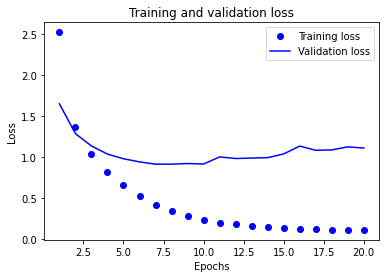

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

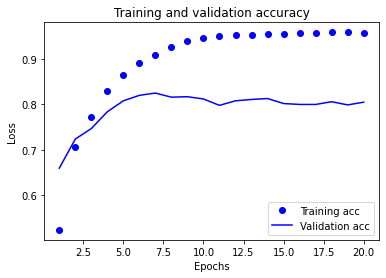

In [ ]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# From the graphs we can see that after the 7th ish epoch the validation acc decreases 
# and validation loss increases. This means our neural network is overfitting to the dataset.
# We can retrain our neural network with less epochs

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(54, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512, 
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 74us/step - loss: 2.6846 - acc: 0.5238 - val_loss: 1.7898 - val_acc: 0.6220
Epoch 2/9
7982/7982 [==============================] - 1s 63us/step - loss: 1.4324 - acc: 0.7037 - val_loss: 1.3211 - val_acc: 0.6980
Epoch 3/9
7982/7982 [==============================] - 0s 62us/step - loss: 1.0465 - acc: 0.7754 - val_loss: 1.1296 - val_acc: 0.7430
Epoch 4/9
7982/7982 [==============================] - 0s 61us/step - loss: 0.8229 - acc: 0.8266 - val_loss: 1.0588 - val_acc: 0.7830
Epoch 5/9
7982/7982 [==============================] - 0s 60us/step - loss: 0.6631 - acc: 0.8602 - val_loss: 0.9647 - val_acc: 0.8080
Epoch 6/9
7982/7982 [==============================] - 0s 62us/step - loss: 0.5349 - acc: 0.8887 - val_loss: 0.9383 - val_acc: 0.8030
Epoch 7/9
7982/7982 [==============================] - 0s 61us/step - loss: 0.4361 - acc: 0.9126 - val_loss: 0.9193 - val_acc: 0.8120
Epoch 8/9
7982

In [ ]:
# You can generate predictions as well.

# Each entry is a 46 dimensional vector for each data point in x_test. The ith entry 
# corresponds to probability of that data point being that category. So to get the prediction
# just get the largest value in vector.
predictions = model.predict(x_test)
print('Predicted category for first data point in x_test: ' + str(np.argmax(predictions[0])))


Predicted category for first data point in x_test: 3
